In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [ ]:
# Thống kê định lượng
df = pd.read_csv('nassCDS.csv')
df

,rownames,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
1,2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
2,3,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
3,4,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
4,5,25-39,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26212,26213,25-39,3179.688,alive,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
26213,26214,10-24,71.228,alive,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
26214,26215,10-24,10.474,alive,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
26215,26216,25-39,10.474,alive,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     26217 non-null  int64  
 1   dvcat        26217 non-null  object 
 2   weight       26217 non-null  float64
 3   dead         26217 non-null  object 
 4   airbag       26217 non-null  object 
 5   seatbelt     26217 non-null  object 
 6   frontal      26217 non-null  int64  
 7   sex          26217 non-null  object 
 8   ageOFocc     26217 non-null  int64  
 9   yearacc      26217 non-null  int64  
 10  yearVeh      26216 non-null  float64
 11  abcat        26217 non-null  object 
 12  occRole      26217 non-null  object 
 13  deploy       26217 non-null  int64  
 14  injSeverity  26064 non-null  float64
 15  caseid       26217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,frontal,ageOFocc,deploy
count,26217.000000,26217.000000,26217.000000
mean,0.643323,37.206202,0.337033
std,0.479027,17.909317,0.472705
min,0.000000,16.000000,0.000000
25%,0.000000,22.000000,0.000000
50%,1.000000,33.000000,0.000000
75%,1.000000,48.000000,1.000000
max,1.000000,97.000000,1.000000


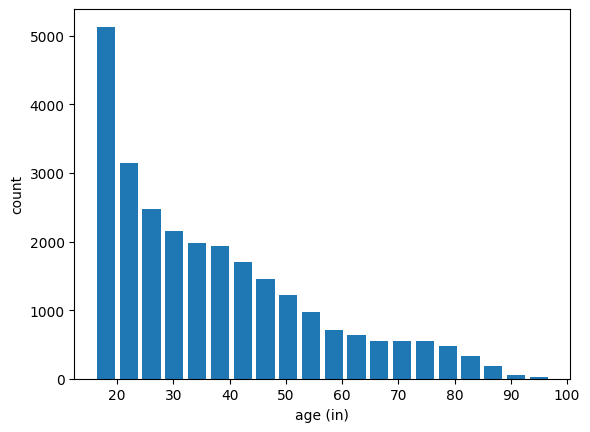

In [ ]:
plt.hist(df.ageOFocc,bins=20,rwidth=0.8)
plt.xlabel('age (in)')
plt.ylabel('count')
plt.show()

In [ ]:
# Thống kê định lượng

df.describe().T


,count,mean,std,min,25%,50%,75%,max
rownames,26217.0,13109.000000,7568.340340,1.0,6555.000,13109.000,19663.000,26217.000
weight,26217.0,462.811611,1524.844430,0.0,32.467,86.986,364.717,57871.595
frontal,26217.0,0.643323,0.479027,0.0,0.000,1.000,1.000,1.000
ageOFocc,26217.0,37.206202,17.909317,16.0,22.000,33.000,48.000,97.000
yearacc,26217.0,1999.555556,1.702546,1997.0,1998.000,2000.000,2001.000,2002.000
yearVeh,26216.0,1992.804699,5.594990,1953.0,1989.000,1994.000,1997.000,2003.000
deploy,26217.0,0.337033,0.472705,0.0,0.000,0.000,1.000,1.000
injSeverity,26064.0,1.715508,1.293357,0.0,1.000,2.000,3.000,6.000


In [ ]:
# Thống kê định tính

df.describe(include= "object").T

,count,unique,top,freq
dvcat,26217,5,10-24,12848
dead,26217,2,alive,25037
airbag,26217,2,airbag,14419
seatbelt,26217,2,belted,18573
sex,26217,2,m,13969
abcat,26217,3,unavail,11798
occRole,26217,2,driver,20601
caseid,26217,9409,13:157:1,11


In [ ]:
#2.2.1 xử lý các thuộc tính không khai thác
df=df.drop(['rownames'],axis = 1)
df=df.drop(['caseid'],axis = 1)
df=df.drop(['yearVeh'],axis = 1)
df=df.drop(['yearacc'],axis = 1)
df=df.drop(['abcat'],axis = 1)
df=df.drop(['injSeverity'],axis = 1)
df=df.drop(['weight'],axis = 1)
df

,dvcat,dead,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy
0,25-39,alive,none,belted,1,f,26,driver,0
1,10-24,alive,airbag,belted,1,f,72,driver,1
2,10-24,alive,none,none,1,f,69,driver,0
3,25-39,alive,airbag,belted,1,f,53,driver,1
4,25-39,alive,none,belted,1,f,32,driver,0
...,...,...,...,...,...,...,...,...,...
26212,25-39,alive,none,belted,1,m,17,driver,0
26213,10-24,alive,airbag,belted,1,m,54,driver,0
26214,10-24,alive,airbag,belted,1,f,27,driver,1
26215,25-39,alive,airbag,belted,1,f,18,driver,1


In [ ]:
#2.2.2 Kiểm tra có bao nhiêu hàng null
null_rows = df.isnull().any(axis=1).sum()
null_rows

0

In [ ]:
#Kiểm tra trùng lặp
df.duplicated().any()

True

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().any()

False

In [ ]:
df

,dvcat,dead,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy
0,25-39,alive,none,belted,1,f,26,driver,0
1,10-24,alive,airbag,belted,1,f,72,driver,1
2,10-24,alive,none,none,1,f,69,driver,0
3,25-39,alive,airbag,belted,1,f,53,driver,1
4,25-39,alive,none,belted,1,f,32,driver,0
...,...,...,...,...,...,...,...,...,...
26157,55+,dead,airbag,none,0,m,22,pass,1
26173,10-24,alive,airbag,belted,0,f,58,driver,1
26179,10-24,alive,airbag,none,1,m,93,driver,0
26183,25-39,dead,none,none,1,m,43,driver,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7645 entries, 0 to 26193
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dvcat     7645 non-null   object
 1   dead      7645 non-null   object
 2   airbag    7645 non-null   object
 3   seatbelt  7645 non-null   object
 4   frontal   7645 non-null   int64 
 5   sex       7645 non-null   object
 6   ageOFocc  7645 non-null   int64 
 7   occRole   7645 non-null   object
 8   deploy    7645 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 597.3+ KB


In [ ]:
# Rời rạc hóa dữ liệu
test = pd.qcut(df['ageOFocc'], q = 4)
test

0        (15.999, 27.0]
1          (59.0, 97.0]
2          (59.0, 97.0]
3          (41.0, 59.0]
4          (27.0, 41.0]
              ...      
26157    (15.999, 27.0]
26173      (41.0, 59.0]
26179      (59.0, 97.0]
26183      (41.0, 59.0]
26193      (27.0, 41.0]
Name: ageOFocc, Length: 7645, dtype: category
Categories (4, interval[float64, right]): [(15.999, 27.0] < (27.0, 41.0] < (41.0, 59.0] <
                                           (59.0, 97.0]]

In [ ]:
df['ageOFocc'] = pd.qcut(df['ageOFocc'], q=4, labels=[1, 2, 3, 4])
df

<ipython-input-14-c699fdda234d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ageOFocc'] = pd.qcut(df['ageOFocc'], q=4, labels=[1, 2, 3, 4])


,dvcat,dead,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy
0,25-39,alive,none,belted,1,f,1,driver,0
1,10-24,alive,airbag,belted,1,f,4,driver,1
2,10-24,alive,none,none,1,f,4,driver,0
3,25-39,alive,airbag,belted,1,f,3,driver,1
4,25-39,alive,none,belted,1,f,2,driver,0
...,...,...,...,...,...,...,...,...,...
26157,55+,dead,airbag,none,0,m,1,pass,1
26173,10-24,alive,airbag,belted,0,f,3,driver,1
26179,10-24,alive,airbag,none,1,m,4,driver,0
26183,25-39,dead,none,none,1,m,3,driver,0


In [ ]:
df

,dvcat,dead,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy
0,25-39,alive,none,belted,1,f,1,driver,0
1,10-24,alive,airbag,belted,1,f,4,driver,1
2,10-24,alive,none,none,1,f,4,driver,0
3,25-39,alive,airbag,belted,1,f,3,driver,1
4,25-39,alive,none,belted,1,f,2,driver,0
...,...,...,...,...,...,...,...,...,...
26157,55+,dead,airbag,none,0,m,1,pass,1
26173,10-24,alive,airbag,belted,0,f,3,driver,1
26179,10-24,alive,airbag,none,1,m,4,driver,0
26183,25-39,dead,none,none,1,m,3,driver,0


In [ ]:
df.to_csv('data_clear.csv')